In [1]:
#allows any changes on external files to be loaded on code run.
%load_ext autoreload
%autoreload 2

debug dist [7.83287265e-01 7.83480226e-01 2.53165205e+00 4.32459898e+00
 4.34425120e+00 5.19991173e+00 5.39128264e+00 6.46474027e+00
 7.14104555e+00 1.92960850e-04 1.74836479e+00 3.54131171e+00
 3.56096393e+00 4.41662446e+00 4.60799537e+00 5.68145300e+00
 6.35775829e+00 1.74817183e+00 3.54111875e+00 3.56077097e+00
 4.41643150e+00 4.60780241e+00 5.68126004e+00 6.35756533e+00
 1.79294692e+00 1.81259914e+00 2.66825967e+00 2.85963058e+00
 3.93308822e+00 4.60939350e+00 1.96522204e-02 8.75312749e-01
 1.06668366e+00 2.14014129e+00 2.81644658e+00 8.55660528e-01
 1.04703144e+00 2.12048907e+00 2.79679436e+00 1.91370912e-01
 1.26482854e+00 1.94113383e+00 1.07345763e+00 1.74976292e+00
 6.76305285e-01]
DEBUG overfit (10, 1) (10, 1)
KERNEL
  rbf.         |               value  |  constraints  |  priors
  variance     |  0.9693396727030926  |      +ve      |        
  lengthscale  |  1.2648285438311175  |      +ve      |        
  rbf.         |  value  |  constraints  |  priors
  variance     |    1

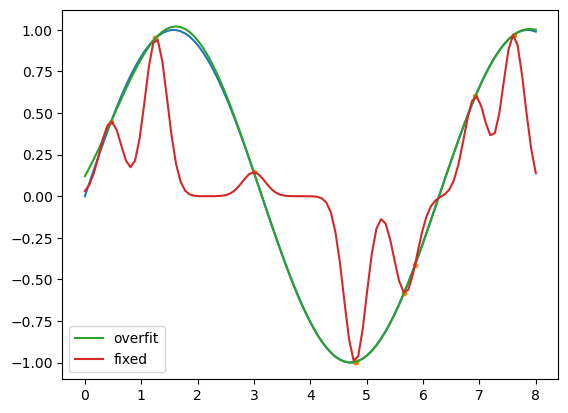

In [14]:
import numpy as np
import matplotlib.pyplot as plt
x_true = np.linspace(0,8, 100)
y_true = np.sin(x_true)

np.random.seed(42)
x_data = np.sort(np.random.uniform(0,8,10))
y_data = np.sin(x_data)



plt.plot(x_true,y_true)
plt.plot(x_data, y_data, '.')

import os
import sys
sys.path.append(os.path.join(os.curdir,'..'))
from GENE_ML.gene_ml.models.GPR import GPR
gpr_overfit = GPR('name', 1, kernel_type='radial_basis_function', do_overfit=True)
l = 0.2
amp = 1000000000
gpr_fixed = GPR('name', 1, kernel_type='radial_basis_function', fixed_kernel_args={'lengthscale':l,'variance':amp})
gpr_overfit.fit(x_data, y_data)
print('KERNEL')
print(gpr_overfit.kernel)
print(gpr_fixed.kernel)
gpr_fixed.fit(x_data, y_data)
print(gpr_overfit.regressor.kern)
y_interpolate = gpr_overfit.predict(x_true, disclude_errors=True)
y_interpolate2 = gpr_fixed.predict(x_true, disclude_errors=True)

plt.plot(x_true, y_interpolate, label='overfit')
plt.plot(x_true, y_interpolate2, label='fixed')
plt.legend()